In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
train_data_dir = "/content/drive/MyDrive/Sayem_Potato_Leaf_/plantvillage_without_aug"
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.25,
  subset="training",
  seed=123,
  image_size=(64,64),
  batch_size=64
)

val_ds = tf.keras.utils.image_dataset_from_directory(
  train_data_dir,
  validation_split=0.25,
  subset="validation",
  seed=123,
  image_size=(64,64),
  batch_size=64)

Found 2152 files belonging to 3 classes.
Using 1614 files for training.
Found 2152 files belonging to 3 classes.
Using 538 files for validation.


In [ ]:
res = ResNet50(input_shape = (64,64,3), weights = 'imagenet', include_top = False)

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in res.layers:
    layer.trainable = False

x = Flatten()(res.output)
prediction = Dense(15, activation='softmax')(x)

model = Model(inputs=res.input, outputs=prediction)
model.summary()
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 70, 70, 3)            0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 32, 32, 64)           9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 32, 32, 64)           256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
history = model.fit(train_ds, validation_data = val_ds, epochs = 10, batch_size = 64)

Epoch 1/10
26/26 [==============================] - 210s 5s/step - loss: 0.7749 - accuracy: 0.7980 - val_loss: 0.7558 - val_accuracy: 0.8048
Epoch 2/10
26/26 [==============================] - 4s 131ms/step - loss: 0.2265 - accuracy: 0.9300 - val_loss: 0.2889 - val_accuracy: 0.9349
Epoch 3/10
26/26 [==============================] - 3s 95ms/step - loss: 0.0729 - accuracy: 0.9715 - val_loss: 0.2622 - val_accuracy: 0.9275
Epoch 4/10
26/26 [==============================] - 3s 97ms/step - loss: 0.0304 - accuracy: 0.9888 - val_loss: 0.2202 - val_accuracy: 0.9349
Epoch 5/10
26/26 [==============================] - 4s 120ms/step - loss: 0.0217 - accuracy: 0.9944 - val_loss: 0.2085 - val_accuracy: 0.9442
Epoch 6/10
26/26 [==============================] - 4s 127ms/step - loss: 0.0142 - accuracy: 0.9988 - val_loss: 0.2055 - val_accuracy: 0.9349
Epoch 7/10
26/26 [==============================] - 3s 100ms/step - loss: 0.0082 - accuracy: 1.0000 - val_loss: 0.2007 - val_accuracy: 0.9368
Epoch 8/1

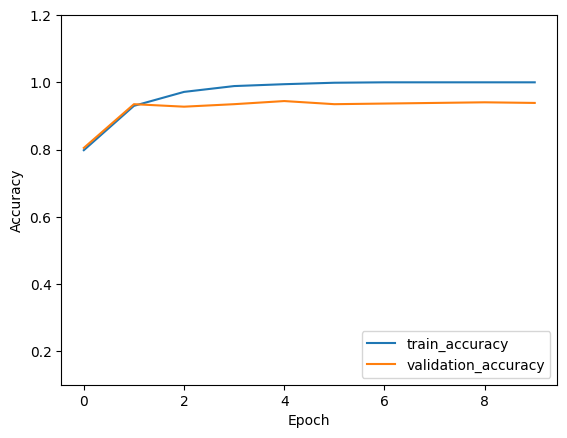

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'validation_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1.2])
plt.legend(loc='lower right')

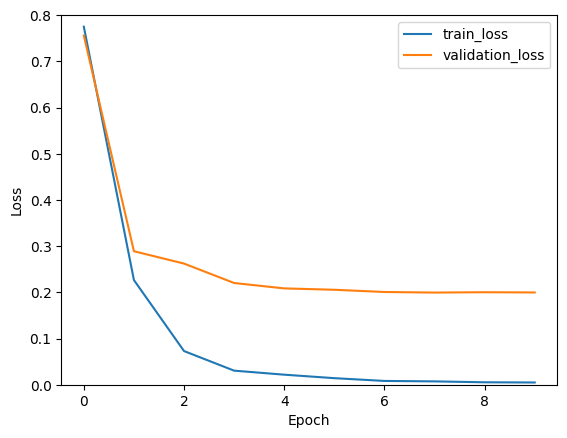

In [ ]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 0.8])
plt.legend(loc='upper right')

1/1 [==============================] - 1s 898ms/step


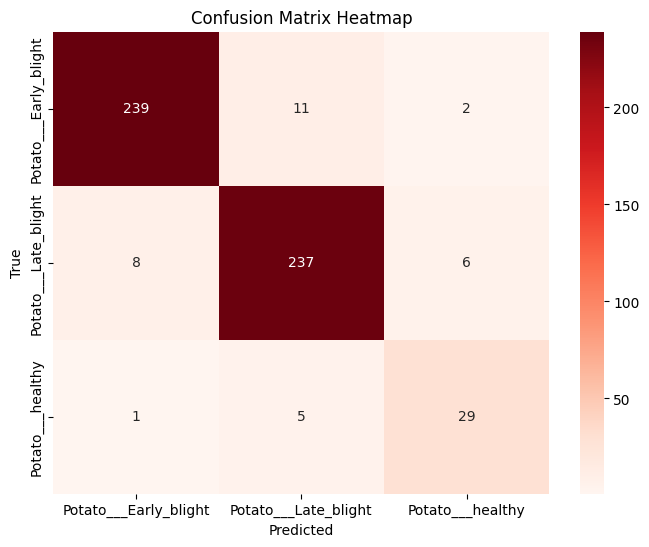

In [ ]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

class_names = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

all_val_labels = []
all_val_predictions = []

# Evaluate the model on the validation dataset batch by batch
for batch in val_ds:
    val_images, val_labels_batch = batch
    val_predictions_batch = model.predict(val_images)

    val_labels_batch = np.array(val_labels_batch)
    val_predictions_batch = np.argmax(val_predictions_batch, axis=-1)

    all_val_labels.extend(val_labels_batch)
    all_val_predictions.extend(val_predictions_batch)

# Calculate the confusion matrix for all validation data
conf_matrix = confusion_matrix(all_val_labels, all_val_predictions)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
print(classification_report(all_val_labels, all_val_predictions, target_names=class_names))

                       precision    recall  f1-score   support

Potato___Early_blight       0.96      0.95      0.96       252
 Potato___Late_blight       0.94      0.94      0.94       251
     Potato___healthy       0.78      0.83      0.81        35

             accuracy                           0.94       538
            macro avg       0.89      0.91      0.90       538
         weighted avg       0.94      0.94      0.94       538

